# Labolatorium 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Fukcje do testów:

In [67]:
def func_1(x):
    return np.cos(x)*np.cosh(x)-1

def func_2(x):
    return 1/x - np.tan(x)

def func_3(x):
    return np.exp2(-x) + np.exp(x) + 2*np.cos(x) - 6

def get_ab(f: int, precision):
    match f:
        case 1: return precision(3*np.pi/2), precision(2*np.pi)
        case 2: return precision(0), precision(np.pi/2)
        case 3: return precision(1), precision(3)
        case _ : return -1

def div_1(x):
    return np.cos(x)*np.sinh(x) - np.cosh(x)*np.sin(x)

def div_2(x):
    return np.power(np.cos(x), -2) - 1/(np.power(x, 2))

def div_3(x):
    return -2*np.sin(x) + np.exp(x) - np.log(x)/np.exp2(x)

functions = [func_1, func_2, func_3]
divs = [div_1, div_2, div_3]

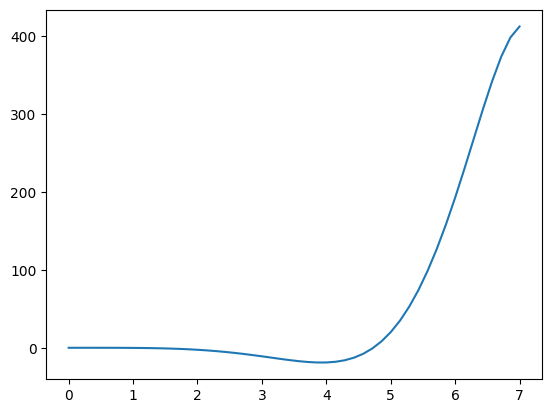

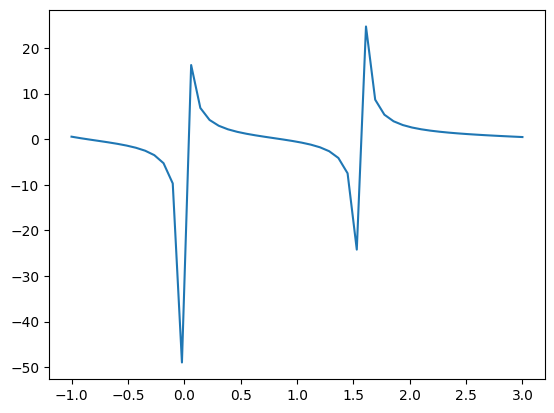

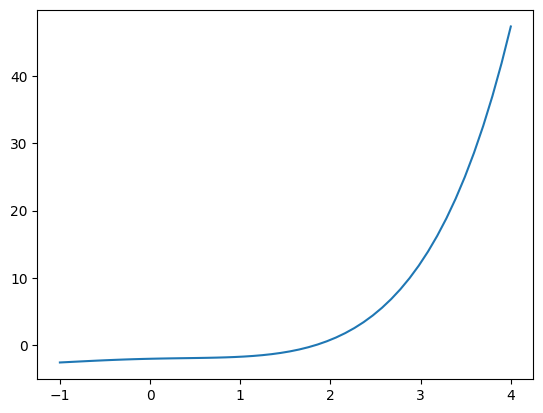

In [10]:
plt.plot(np.linspace(0,7), func_1(np.linspace(0,7)))
plt.show()
plt.plot(np.linspace(-1, 3), func_2(np.linspace(-1, 3)))
plt.show()
plt.plot(np.linspace(-1,4), func_3(np.linspace(-1,4)))
plt.show()

### Zadanie 1 - metoda bisekcji

In [30]:
def bisection_method(func, a, b, error):
    min_n = int(np.ceil(np.log((b-a)/error)/np.log(2.0)))
    mid = 0
    for i in range(min_n):
        mid = (a+b)/2
        if func(a) == 0:
            return a, i+1
        elif func(b) == 0:
            return b, i+1
        elif func(mid) == 0:
            return mid, i+1
        
        if func(a)*func(mid)<0:
            b = mid
        else:
            a = mid
    return mid, min_n


In [68]:
absolute_errors = [np.power(10, -7, dtype=np.longdouble), np.power(10, -15, dtype=np.longdouble), np.power(10, -33, dtype=np.longdouble)]
error_names = ["10^-7", "10^-15", "10^-33"]
for e in range(len(absolute_errors)):
    print(error_names[e])
    for i in range(len(functions)):
        a, b = get_ab(i+1, np.longdouble)
        zero, n = bisection_method(functions[i], a, b, absolute_errors[e])
        print(i+1, zero, n)


10^-7
1 4.730040713775952 24
2 0.8603335555687444 24
3 1.8293835520744324 25
10^-15
1 4.730040744862705 51
2 0.8603335890193795 51
3 1.8293836019338494 51
10^-33
1 4.730040744862704 111
2 0.8603335890193797 53
3 1.8293836019338487 53


C:\Users\franc\AppData\Local\Temp\ipykernel_22948\873856791.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/x - np.tan(x)


### Zadanie 2 - Metoda Newtona

In [81]:
def newtons_method(func, func_div, start, max_iter, error):
    i = 0
    x = start
    while i< max_iter and np.abs(func(x)) > error:
        i += 1
        x = x - func(x)/func_div(x)
    return x, i

In [89]:
max_iter = 1000
for e in range(len(absolute_errors)):
    print(error_names[e])
    for i in range(len(functions)):
        a, b = get_ab(i+1, np.longdouble)
        start = a
        if i == 1: start = b
        zero, n = newtons_method(functions[i], divs[i], start, max_iter, absolute_errors[e])
        print(i+1, zero, n)

10^-7
1 4.7300407448627135 3
2 1.5707963267948966 1000
3 1.8293836030487969 7
10^-15
1 4.730040744862704 1000
2 1.5707963267948966 1000
3 1.829383601933849 10
10^-33
1 4.730040744862704 1000
2 1.5707963267948966 1000
3 1.8293836019338487 11


### Zadanie 3 - metoda siecznych

In [53]:
def secant_method(func, a, b, max_iter, error):
    i = 0
    x_a = b
    x_b = b - 0.0001
    while i<max_iter and np.abs(func(x_b)) > error:
        i += 1
        x_b, x_a = x_b - func(x_b)*(x_b-x_a)/(func(x_b)- func(x_a)), x_b
    return x_b, i

In [88]:
max_iter = 1000
for e in range(len(absolute_errors)):
    print(error_names[e])
    for i in range(len(functions)):
        a, b = get_ab(i+1, np.longdouble)
        if i == 1: b = 1
        zero, n = secant_method(functions[i], a, b, max_iter, absolute_errors[e])
        print(i+1, zero, n)

10^-7
1 4.730040744871109 8
2 0.8603335905470574 4
3 1.8293836019347347 8
10^-15
1 nan 11
2 0.8603335890193797 6
3 1.8293836019338487 9
10^-33
1 nan 11
2 0.8603335890193797 6
3 1.8293836019338487 9


C:\Users\franc\AppData\Local\Temp\ipykernel_22948\3198487493.py:7: RuntimeWarning: invalid value encountered in scalar divide
  x_b, x_a = x_b - func(x_b)*(x_b-x_a)/(func(x_b)- func(x_a)), x_b
